### Basic Nerual Network
Followed tutioral from:
https://www.youtube.com/watch?v=VMj-3S1tku0&t=2143s&ab_channel=AndrejKarpathy

In [1976]:
#Libraries to be install
import numpy as np
import math
import graphviz as gv
from graphviz import Digraph
import random
random.seed(42)

In [1977]:
class perceptron:
    def __init__(self, x):
        self.value = 0.0 + x
        self.children = []
        self.parents = []

    def add_child(self, child):
        self.children.append(child)
        child.parents.append([self, random.uniform(-1,1)])

In [1978]:
class nerualNetwork:
    def __init__(self, numIn, numLayers, numOut, actFunc, self.self.self.lossFunc, bias):
        self.numIn = numIn
        self.numLayers = numLayers 
        self.numOut = numOut
        self.inputs = []
        self.outputs = []
        self.actFunc = actFunc
        self.lossFunc = lossFunc
        self.bias = bias
        self.construct()

    def construct(self):

        def connect(lstOne, lstTwo):
            for node1 in lstOne:
                for node2 in lstTwo:
                    node1.add_child(node2)
            return lstOne
            
        inputs = []
        outputs = []
        layers = []

        # Intilizing the input column
        for i in range(self.numIn):
            input1 = perceptron(0)
            inputs.append(input1)

        # Intilizing the output column
        for i in range(self.numOut):
            output1 = perceptron(0)
            outputs.append(output1)

        if len(self.numLayers) == 0:
            inputs = connect(inputs, outputs)
            self.inputs = inputs
            self.outputs = outputs
        else:
            # Creating the layers
            for i, item in enumerate(self.numLayers):
                lyrIns = []
                for i in range(item):
                    input2 = perceptron(0)
                    lyrIns.append(input2)
                layers.append(lyrIns)
            
            
            # Iterate through the layers in reverse order
            for i in range(len(layers) - 1, -1, -1):
                    
                # If it's the last layer, connect it to the current layer
                if i == len(layers) - 1:
                    current = layers[i]
                    current = connect(current, outputs)
                
                # If it's not the last layer, connect it to the next layer
                else:
                    next_layer = layers[i]
                    next_layer = connect(next_layer, current)
                    current = next_layer

            # Finally, connect the input layer to the current layer
            inputs = connect(inputs, current)
            
            self.inputs = inputs
            self.outputs = outputs

    def forwardProp(self, inpts):
        for i in range(len(self.inputs)):
            self.inputs[i].value = inpts[i]
            
        def DFS_forward(node):
            # Get list of the current children
            lstChildren = node.children #[sublist[0] for sublist in node.children]
            # Print the child Val & Grad and decend back down
            for child in lstChildren:
                values = [sublist[0].value for sublist in child.parents]
                weights = [sublist[1] for sublist in child.parents]
                x = np.dot(values, weights) + self.bias
                if self.actFunc == "Sigmoid":
                    x = np.clip(x, -500, 500)  # limit values to prevent overflow 
                    x = 1 / (1 + np.exp(-x))
                elif self.actFunc == "ReLU":
                    x = np.maximum(0, x)
                elif self.actFunc == "Softplus":
                    x = np.clip(x, -500, 500)  # limit values to prevent overflow
                    x = np.log(1 + np.exp(x))
                child.value = x
                DFS_forward(child)

        for n in self.inputs:
            DFS_forward(n)
        
        return 0
    

    def backwardProp(self, labels, r):
        def DFS_backward(node, label, r):
            # Get list of the current children
            pairsParents = node.parents
            # Print the child Val & Grad and decend back down
            for pair in pairsParents:
                newWeight = 0
                a0 = node.value
                a1 = pair[0].value
                w = pair[1]
                grad = 0
                if self.actFunc == "Sigmoid": 
                    sigmoid_derivative = a1 * (1 - a1)
                    if self.lossFunc == "CrossEntropy":
                        grad = a0 - label
                    elif self.lossFunc == "MSE":
                        grad = 2 * (a0 - label)
                    newWeight = w - r * grad * sigmoid_derivative
                elif self.actFunc == "ReLU":
                    relu_derivative = 1 if a1 > 0 else 0
                    grad = 2 * (a0 - label) if self.lossFunc == "MSE" else a0 - label
                    newWeight = w - r * grad * relu_derivative
                elif self.actFunc == "Softplus":
                    softplus_derivative = 1 / (1 + np.exp(-a1))
                    grad = 2 * (a0 - label) if self.lossFunc == "MSE" else a0 - label
                    newWeight = w - r * grad * softplus_derivative

                pair[1] = newWeight  # update weight
                self.bias -= r * grad  # update bias

                DFS_backward(pair[0],label,r)

        # Compute the gradient of the loss function
        if self.lossFunc == "CrossEntropy":
            grad = [output.value - label for output, label in zip(self.outputs, labels)]
        elif self.lossFunc == "MSE":
            grad = [2 * (output.value - label) for output, label in zip(self.outputs, labels)]

        # Propagate the gradient back through the network
        for node, g in zip(self.outputs, grad):
            DFS_backward(node, g, r)

    
    # def train(self, inputs, labels, r,epochs,lossFunc):

    #     for _ in range(epochs):
    #         for input, label in zip(inputs,labels):
    #             self.forwardProp(input)
    #             self.backwardProp(label,r,lossFunc)


    def calculate_loss(self, labels):
        if self.lossFunc == "CrossEntropy":
            # Binary Cross-Entropy Loss
            losses = [-label * np.log(output.value + 1e-7) - (1 - label) * np.log(1 - output.value + 1e-7) 
                    for output, label in zip(self.outputs, labels)]
        elif self.lossFunc == "MSE":
            # Mean Squared Error Loss
            losses = [0.5 * (output.value - label)**2 for output, label in zip(self.outputs, labels)]
        return np.mean(losses)


    def train(self, inputs, labels, r, epochs):
        for _ in range(epochs):
            for input, label in zip(inputs,labels):
                self.forwardProp(input)
                print('Loss:', self.calculate_loss(label, self.lossFunc))
                self.backwardProp(label,r,self.lossFunc)

    def predict(self, inputs):
        self.forwardProp(inputs)
        return [node.value for node in self.outputs]
        

In [1979]:
# Graphing Function
def trace(roots):
    nodes, edges = set(), set()
    visited = set()

    def build(v):
        if v not in visited:
            visited.add(v)
            nodes.add(v)
            for child in reversed(v.children):
                edges.add((child, v))
                build(child)

    for root in roots:
        build(root)

    return nodes, edges

def draw_dot(roots):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right

    nodes, edges = trace(roots)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="value: %.4f" % (n.value), shape='circle', width='1.0', height='1.0')
    x = 1
    for n1, n2 in edges:
        
        # connect n1 to n2
        weights1 = [sublist[1] for sublist in n1.parents]
        nodeP1 = [sublist[0] for sublist in n1.parents]
        weight = 0
        for index, parent in enumerate(nodeP1):
            if parent == n2:
                weight = weights1[index]

        edge_label = "w: %.4f" % weight
        dot.edge(str(id(n2)), str(id(n1)), label=edge_label)
        x+=1

    return dot

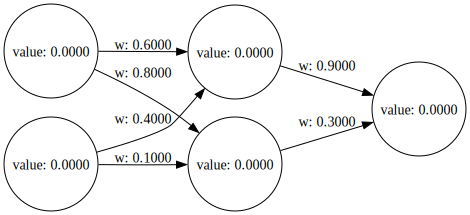

In [1980]:
NN = nerualNetwork(2,[2],1,"Sigmoid",0.1)
x = 0.8
NN.inputs[0].children[0].parents[0][1] = 0.1
NN.inputs[0].children[0].parents[1][1] = 0.8
NN.inputs[0].children[1].parents[0][1] = 0.4
NN.inputs[0].children[1].parents[1][1] = 0.6
NN.inputs[0].children[0].children[0].parents[0][1] = 0.3
NN.inputs[0].children[0].children[0].parents[1][1] = 0.9
draw_dot(NN.inputs)



0


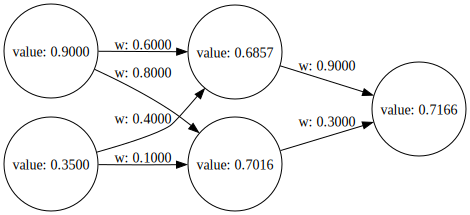

In [1981]:
print(NN.forwardProp([0.35,0.9]))
draw_dot(NN.inputs)

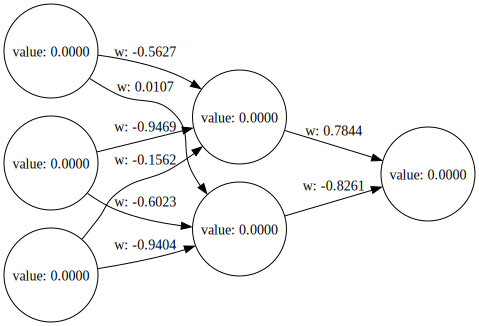

In [1982]:
ANDgateModel = nerualNetwork(3,[2],1,"Sigmoid","MSE",-1)
draw_dot(ANDgateModel.inputs)

In [1983]:
xs = [
  [0, 0, 0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 1],
  [1, 0, 0],
  [1, 0, 1],
  [1, 1, 0],
  [1, 1, 1],
]
ys = [[0],[0],[0],[1],[1],[0],[0],[1]] # desired targets

ANDgateModel.train(xs, ys, 0.001, 300)


Loss: 0.03557480548221028
Loss: 0.034281414489558994
Loss: 0.03219803198023717
Loss: 0.27683770722846734
Loss: 0.2569181532158673
Loss: 0.035425276735998566
Loss: 0.035228634365018226
Loss: 0.27235142639963833
Loss: 0.0329671872258242
Loss: 0.03180540225693308
Loss: 0.029885401339530805
Loss: 0.28375303745610936
Loss: 0.26492308940677695
Loss: 0.03272431652124451
Loss: 0.03255047880475946
Loss: 0.2798164863336838
Loss: 0.030447030866212418
Loss: 0.029409109674971092
Loss: 0.02764934464291784
Loss: 0.2908007078854836
Loss: 0.2730836413277466
Loss: 0.030122858927910758
Loss: 0.029970059516096575
Loss: 0.28741207668714913
Loss: 0.0280216656339478
Loss: 0.027099557153337308
Loss: 0.025495779841208585
Loss: 0.2979656639175822
Loss: 0.2813776096477716
Loss: 0.02762837339824655
Loss: 0.02749484722829417
Loss: 0.2951190279610292
Loss: 0.025697713894327495
Loss: 0.024883157504655393
Loss: 0.023430075806799393
Loss: 0.30523094740504464
Loss: 0.2897803488086002
Loss: 0.025247434918018386
Loss: 0.

Predict: 0.000, TrueVal: 0
Predict: 0.000, TrueVal: 0
Predict: 0.000, TrueVal: 0
Predict: 0.000, TrueVal: 1
Predict: 0.000, TrueVal: 1
Predict: 0.000, TrueVal: 0
Predict: 0.000, TrueVal: 0
Predict: 0.000, TrueVal: 1


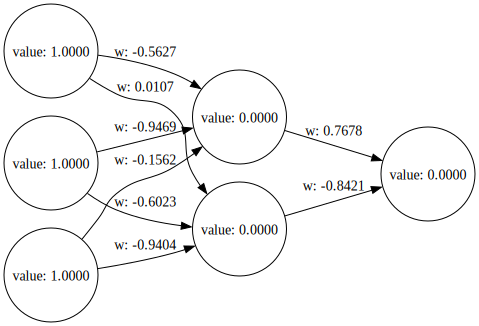

In [1984]:
for i in range(len(xs)):
    print('Predict: %0.3f, TrueVal: %d'%(ANDgateModel.predict(xs[i])[0], ys[i][0]))

draw_dot(ANDgateModel.inputs)